This code reads in just one model data file for testing purposes
- W and Z are just one day of 3 hourly data so 8 times
- QRAIN is one month of 3 hourly data so 248 times for march (31 days)
- reflectivity is 3 months of data (Jan-Mar) 3 hourly data (for 2013 [90 days * 8] 3 hourly times = 720)
Converts the Z field from MSL to AGL
lines up the data to the same time and plots all fields

In [1]:
import load_data
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import importlib

In [2]:
w = load_data.load_W_data_oneTime()
print(w.shape)

(8, 51, 1015, 1359)


In [3]:
qr = load_data.load_QRAIN_data_oneTime()
print(qr.shape)

(248, 50, 1015, 1359)


In [4]:
ref = load_data.load_refl_data_oneTime()
print(ref.shape)

(720, 1015, 1359)


In [5]:
z = load_data.load_Z_data_oneTime()

#
# Terrain is the lowest Z level in the hybrid data
#
terrain_ht = z[:,0,:,:].copy()
terrain_ht = terrain_ht[:,np.newaxis,:,:]

print(z.shape)
print(terrain_ht.shape)

(8, 51, 1015, 1359)
(8, 1, 1015, 1359)


In [6]:
print(z.shape)
print(z[7,0,820,701])
print(z[7,1,820,701])

(8, 51, 1015, 1359)
223.7608
269.5653


In [7]:
#
# convert Z to AGL by subtracting out the terrain.
#
for i in range(0, z.shape[1]):
    z[:,i,:,:] = np.subtract(z[:,i,:,:], terrain_ht[:,0,:,:])

print(z[7,0,820,701])
print(z[7,1,820,701])

0.0
45.804504


In [8]:
d1 = w[7,0,:,:]
print(d1.shape)
wp = np.percentile(d1, 99.9)

d2 = qr[247,0,:,:]
print(d2.shape)
qrp = np.percentile(d2, 99.9)

d3 = ref[719,:,:]
print(d3.shape)
rp = np.percentile(d3, 99.9)

d4 = terrain_ht[7,0,:,:]
print(d4.shape)
rp = np.percentile(d3, 99.9)

(1015, 1359)
(1015, 1359)
(1015, 1359)
(1015, 1359)


<Figure size 432x288 with 0 Axes>

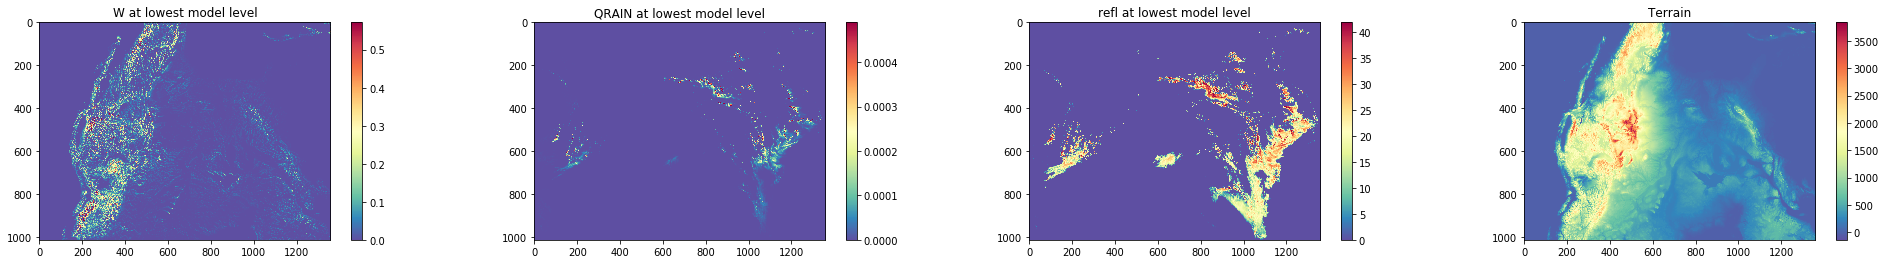

In [10]:
import cartopy.crs as ccrs
cmap = plt.cm.Spectral_r
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(34,4))

w = ax1.imshow(d1, cmap=cmap)
ax1.set_title("W at lowest model level")
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()
#ax.coastlines()
w.set_clim(vmin=0, vmax=wp)

fig.colorbar(w, ax=ax1, orientation='vertical', label='')

qr = ax2.imshow(d2, cmap=cmap)
ax2.set_title("QRAIN at lowest model level")
qr.set_clim(vmin=0, vmax=qrp)
fig.colorbar(qr, ax=ax2, orientation='vertical', label='')

ref = ax3.imshow(d3, cmap=cmap)
ax3.set_title("refl at lowest model level")
ref.set_clim(vmin=0, vmax=rp)
fig.colorbar(ref, ax=ax3, orientation='vertical', label='')

zee = ax4.imshow(d4, cmap=cmap)
ax4.set_title("Terrain")
zee.set_clim()
fig.colorbar(zee, ax=ax4, orientation='vertical', label='')
